In [62]:
import os
import pandas as pd
import pdb
import time

cnt = 0
#score = 0.0

path = 'StackPreds/TopN_XGB/'

xgb_topn_repo = {}      
#select_to_essemble = [] # this will affect the scatter plotting later
select_to_essemble = ['9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz', 
                     '9857_xgb_ensemble_5_1520005508.csv.gz']

# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv
# 3. 9839_sub_FastText_cleaned_200_300_50_50_0.1_32_6_1518834132.csv

# 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz 
# 1. 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz

# 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz: 
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv

for filename in os.listdir(path):
    #pdb.set_trace()
    #score += float(item.split('_')[-1])
    select = None
    if len(select_to_essemble) == 0: # if selecting any specific ones to essemble, then essemble all 
        select = filename
    else:
        if filename in select_to_essemble:
            select = filename
        else:
            continue
    print('selected: ' + select)
    tmp = pd.read_csv(path+select)
    xgb_topn_repo[select] = tmp
    if cnt == 0:
        preds = tmp
        label_cols = list(preds.columns)
        label_cols.pop(0) # remove 'id'
    else:
        preds[label_cols] += tmp[label_cols]
    cnt += 1

print(str(cnt)+' results selected')
preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)

selected: 9857_xgb_ensemble_5_1520005508.csv.gz
selected: 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
2 results selected


In [63]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [64]:
preds.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999419,0.431438,0.986879,0.159619,0.954971,0.400991
1,0000247867823ef7,0.000194,0.001370,0.000594,0.000326,0.000706,0.000648
2,00013b17ad220c46,0.003057,0.001393,0.000745,0.000573,0.000842,0.000740


In [65]:
list(xgb_topn_repo)

['9857_xgb_ensemble_5_1520005508.csv.gz',
 '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz']

In [66]:
from toxic_utils import scatter_per_label
%matplotlib inline

toxic
severe_toxic
obscene
threat
insult
identity_hate
['9857_xgb_ensemble_5_1520005508.csv.gz', '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz']


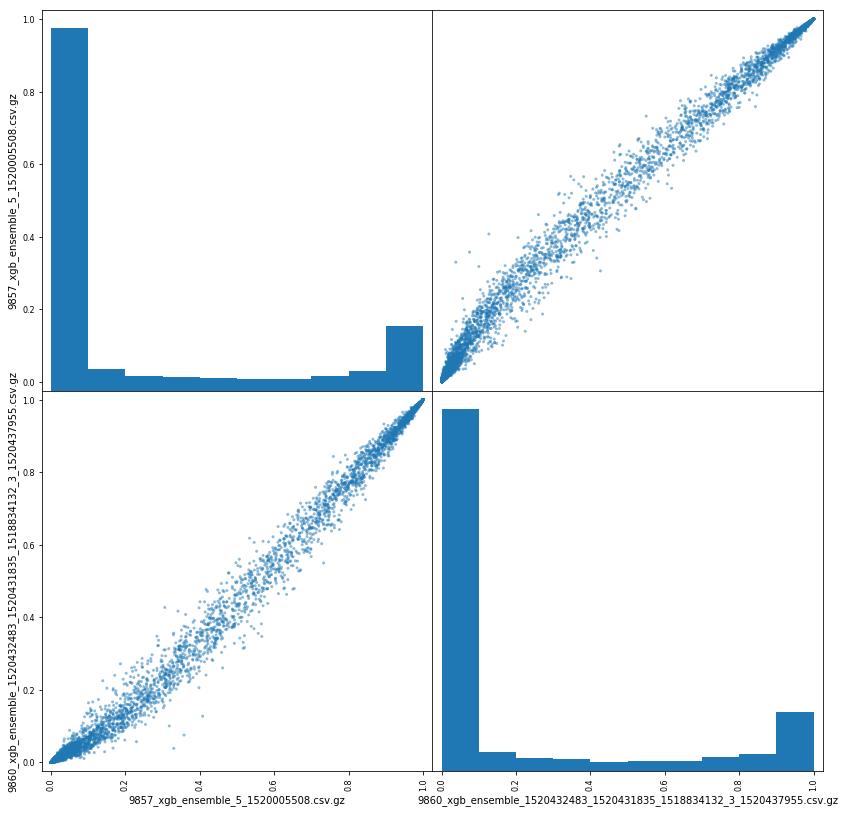

In [67]:
scatter_per_label(xgb_topn_repo, 'toxic', 10000)

In [68]:
for selected in select_to_essemble:
    print(selected.split('_')[-1].split('.')[0])

1520437955
1520005508


In [69]:
essemble_name = 'xgb_ensemble_1520437955_1520005508'
preds.to_csv(path+essemble_name+'_{}_{}.csv.gz'.format(cnt, int(time.time())), index=False, compression='gzip')